# url 수집

In [5]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

import chromedriver_autoinstaller
# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 검색어
search_name = input('검색어는 무엇입니까?: ')

검색어는 무엇입니까?: 전기 면도기


In [3]:
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

#다나와
driver.get('http://www.danawa.com')
time.sleep(1) 

In [ ]:
# 검색창에 커서 클릭 / 있어도 되고 없어도 됨
driver.find_element_by_css_selector(".search__input").click()

In [ ]:
search = driver.find_element_by_id("AKCSearch")
search.send_keys(search_name)
search.submit()
time.sleep(1)

In [ ]:
#url 수집
product_url_list = []
product_title_list = []

product = ".click_log_product_standard_title_"
product_raw = driver.find_elements_by_css_selector(product)
product_raw[0]

In [ ]:
# 크롤링한 url 정제 시작
for i in product_raw:
    url = i.get_attribute('href')
    product_url_list.append(url)
time.sleep(1)
    
# 제목 크롤링 시작    
for j in product_raw:
    title = j.text
    product_title_list.append(title)

    print(title)

print("")
print('url갯수: ', len(product_url_list))
print('title갯수: ', len(product_title_list))

In [ ]:
df1 = pd.DataFrame({'url':product_url_list})
df1 = df1.drop_duplicates('url')
df1

In [ ]:
df2 = pd.DataFrame({'title':product_title_list})
df2 = df2.drop_duplicates('title')
df2

In [ ]:
df = pd.concat([df1,df2], axis = 1)

In [ ]:
df

In [ ]:
# csv파일로 저장
df.to_csv("danawa_shaver.csv", encoding = 'utf-8-sig')

# danawa 뒤에 제품명 기입.
# 그 후 esc  =>  ctrl + a  =>   f   => replace로 이름 다 바꿔주기 

# 크롤링 준비

In [6]:
# "url_list.csv" 불러오기
url_load = pd.read_csv("danawa_shaver.csv")
url_load = url_load.drop("Unnamed: 0", axis=1)
url_load

,url,title
0,http://prod.danawa.com/info/?pcode=5309652&key...,브라운 시리즈3 310S
1,http://prod.danawa.com/info/?pcode=11964506&ke...,브라운 시리즈7 70-S1200s
2,http://prod.danawa.com/info/?pcode=12480734&ke...,필립스 SkinIQ 5000시리즈 S5588/17
3,http://prod.danawa.com/info/?pcode=15808334&ke...,브라운 시리즈9 PRO 9477cc + PC
4,http://prod.danawa.com/info/?pcode=14326781&ke...,필립스 SkinIQ 9000시리즈 S9982/50
5,http://prod.danawa.com/info/?pcode=15218660&ke...,브라운 시리즈9 PRO 9410s
6,http://prod.danawa.com/info/?pcode=8782562&key...,브라운 시리즈8 8330s
7,http://prod.danawa.com/info/?pcode=8897732&key...,브라운 시리즈9 9395CC
8,http://prod.danawa.com/info/?pcode=15218651&ke...,브라운 시리즈8 Sonic 8453cc
9,http://prod.danawa.com/info/?pcode=12113960&ke...,브라운 시리즈7 70-S7200cc


In [7]:
j = 0

url = url_load['url'][j]
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
driver.get(url) 

In [ ]:
dict = {}
target_info = {}

In [ ]:
# 상품의견 클릭
driver.find_element_by_id('bookmark_cm_opinion_item').click()
time.sleep(1)

In [ ]:
# 디폴트로 다나와 상품의견이 눌려있을 수 있음. 그러나 다나와 상품의견은 광고, 욕설 등의 이유로 삭제된 게시글이 대부분이라 적절하지 않음.
# 쇼핑몰 상품리뷰 크롤링이므로 클릭해줘야 함. 하지만 쇼핑몰 상품리뷰 셀레늄이 제품마다 다름. 크게 두 가지로 구성되어 있음.
try :
    driver.find_element_by_id('danawa-prodBlog-companyReview-button-tab-companyReview').click()
    
except:
    driver.find_element_by_id('danawa-prodBlog-productOpinion-button-tab-companyReview').click()

In [ ]:
# 최저가 크롤링
result1 = ".prc_c"
result_1 = driver.find_element_by_css_selector(result1)
lowprice = result_1.text
lowprice

In [ ]:
# 평점 크롤링
# 리뷰가 없는 경우가 있으므로 없을시 Nodata출력 
try:
    result2 = ".point_num .num_c"
    result_2 = driver.find_element_by_css_selector(result2)
    score = result_2.text
    print(score)

except:
    score = "Nodata"
    print(score)

In [ ]:
# 리뷰수 크롤링
# 리뷰가 없는 경우가 있으므로 없을시 Nodata출력 
try:
    result3 = ".cen_w .num_c"
    result_3 = driver.find_element_by_css_selector(result3)
    review_num = result_3.text
    print(review_num)
    
except:
    review_num = "Nodata"
    print(review_num)

In [ ]:
#  리뷰 크롤링
try:
    result4 = ".atc"                                 
    result_4 = driver.find_elements_by_css_selector(result4) 

    content_list = []
    for content in result_4:
        content_list.append(content.text)

    content_str = ' '.join(content_list)
    content_str

except:
    content_str = "Nodata"
    print(content_str)

In [ ]:
#  쇼핑 사이트 크롤링
try:
    result5 = ".top_info .mall"                                 
    result_5 = driver.find_elements_by_css_selector(result5) 

    shoppingmall_list = []
    for shoppingmall in result_5:
        shoppingmall_list.append(shoppingmall.text)

    shoppingmall_str = ' '.join(shoppingmall_list)
    shoppingmall_str
    print(shoppingmall_str)
    
except: # 쇼핑 사이트는 무조건 있는 사항이므로 없어도 될 듯
    shoppingmall_str = "Nodata"
    print(shoppingmall_str)

In [ ]:
#리뷰 및 쇼핑몰 크롤링
try:
    page_num_css = driver.find_elements_by_css_selector('.mall_review .nums_area')
    page_num_rp = page_num_css[0].text.replace('\n',' ')

    if len(page_num_rp) % 2 != 0:
        page_num = int(len(page_num_rp)//2)+1

    else: 
        page_num = int(len(page_num_rp)//2)


    content_list = []
    shoppingmall_list = []
    m = list(range(2,12))   # 자동 1번 선택이므로 2번부터 시작, 
                            # for문 보면 크롤링 후 페이지 넘기므로 마지막 10번째장 하려면 12로 지정해야함.
                            # 11로 주면 1번 페이지는 따로 해서 더해줘야 하므로 불편.

    for k in list(map(str, m)):
        result4 = ".atc"                                   
        result_4 = driver.find_elements_by_css_selector(result4)

        result5 = ".top_info .mall"                                 
        result_5 = driver.find_elements_by_css_selector(result5) 

        for content in result_4:
            content_list.append(content.text)

        content_str = ' '.join(content_list)
        time.sleep(1)

        for shoppingmall in result_5:
            shoppingmall_list.append(shoppingmall.text)

        shoppingmall_str = ' '.join(shoppingmall_list)

        if int(k) <= page_num:   # 다음장 없으면 다음장 안누름.
            driver.find_element_by_link_text(k).click()
            time.sleep(1)
        else:             
            break 
            
except:
    content_str = "Nodata"
    shoppingmall_str = "Nodata"

# for문으로 크롤링

In [ ]:
# "url_list.csv" 불러오기
url_load = pd.read_csv("danawa_shaver.csv")
url_load = url_load.drop("Unnamed: 0", axis=1)
url_load

In [ ]:
dict = {}

number = 10  # 크롤링 할 제품의 갯수 지정 (하나 당 35초 정도 소요) 

for i in tqdm_notebook(range(0, number)):
    
    url = url_load['url'][i]
    chrome_path = chromedriver_autoinstaller.install()
    driver = webdriver.Chrome(chrome_path)
    driver.get(url)  
        
    a = driver.find_element_by_id('bookmark_cm_opinion_item')
    a.click()
        
    try :
        driver.find_element_by_id('danawa-prodBlog-companyReview-button-tab-companyReview').click()

    except:
        driver.find_element_by_id('danawa-prodBlog-productOpinion-button-tab-companyReview').click()
        
    # 크롤링
    
    try : 
        
        target_info = {} 
        
        #상품명
        prod_title = url_load['title'][i]
        
        #상품명 url
        prod_url = url_load['url'][i]
        
        # 최저가 크롤링
        result1 = ".prc_c"
        result_1 = driver.find_element_by_css_selector(result1)
        lowprice = result_1.text
        time.sleep(2)
        
        #  평점 크롤링
        try:
            result2 = ".point_num .num_c"
            result_2 = driver.find_element_by_css_selector(result2)
            score = result_2.text

        except:
            score = "Nodata"
            
            
        #  리뷰수 크롤링
        try:
            result3 = ".cen_w .num_c"
            result_3 = driver.find_element_by_css_selector(result3)
            review_num = result_3.text
            
        except:
            review_num = "Nodata"
            
        
        #리뷰 및 쇼핑몰 크롤링
        try:
            page_num_css = driver.find_elements_by_css_selector('.mall_review .nums_area')
            page_num_rp = page_num_css[0].text.replace('\n',' ')

            if len(page_num_rp) % 2 != 0:
                page_num = int(len(page_num_rp)//2)+1

            else: 
                page_num = int(len(page_num_rp)//2)


            content_list = []
            shoppingmall_list = []
            m = list(range(2,12))   # 자동 1번 선택이므로 2번부터 시작, 
                                    # for문 보면 크롤링 후 페이지 넘기므로 마지막 10번째장 하려면 12로 지정해야함.
                                    # 11로 주면 1번 페이지는 따로 해서 더해줘야 하므로 불편.

            for k in list(map(str, m)):
                result4 = ".atc"                                   
                result_4 = driver.find_elements_by_css_selector(result4)

                result5 = ".top_info .mall"                                 
                result_5 = driver.find_elements_by_css_selector(result5) 

                for content in result_4:
                    content_list.append(content.text)

                content_str = ' '.join(content_list)
                time.sleep(1)

                for shoppingmall in result_5:
                    shoppingmall_list.append(shoppingmall.text)

                shoppingmall_str = ' '.join(shoppingmall_list)

                if int(k) <= page_num:   # 다음장 없으면 다음장 안누름.
                    driver.find_element_by_link_text(k).click()
                    time.sleep(1)
                else:             
                    break 

        except:
            content_str = "Nodata"
            shoppingmall_str = "Nodata"
                
        #딕셔너리 저장 
        target_info['상품명'] = prod_title
        target_info['상품url'] = prod_url
        target_info['최저가'] = lowprice
        target_info['평점'] = score
        target_info['리뷰수'] = review_num
        target_info['리뷰글'] = content_str
        target_info['쇼핑몰'] = shoppingmall_str
        time.sleep(2)
        
        dict[i] = target_info
        time.sleep(1)
        driver.close()       
    
    except:
        driver.close()
        time.sleep(1)
        continue
    
print('수집한 글 갯수: ', len(dict))

In [ ]:
print(dict)

In [ ]:
danawa_df = pd.DataFrame.from_dict(dict, 'index')
danawa_df

In [ ]:
danawa_df.to_csv("danawa_shaver_crawl.csv", encoding='utf-8-sig')

# 파이차트

In [8]:
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

3.4.3


In [9]:
danawa_shaver_crawl = pd.read_csv("danawa_shaver_crawl.csv")

In [10]:
wordList = danawa_shaver_crawl.쇼핑몰[0].split()
wordCount = {} 
 
for word in wordList:
 
    # Get 명령어를 통해, Dictionary에 Key가 없으면 0리턴
 
    wordCount[word] = wordCount.get(word, 0) + 1 
    
    keys = sorted(wordCount.keys())
 
for word in keys:
 
    print(word + ':' + str(wordCount[word])) 

11번가:37
G마켓:27
SSG.COM:3
롯데홈쇼핑:3
신세계몰:3
옥션:24
인터파크:2
현대Hmall:1


In [11]:
r = pd.Series(wordCount.values(),index = wordCount.keys())
r

G마켓        27
11번가       37
SSG.COM     3
신세계몰        3
롯데홈쇼핑       3
옥션         24
인터파크        2
현대Hmall     1
dtype: int64

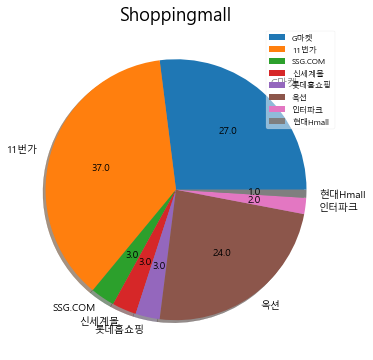

In [12]:
plt.figure(figsize=(6,6))

plt.pie(r, labels = r.index, autopct='%.1f', shadow = True)
plt.title('Shoppingmall', fontsize=18)
plt.legend(r.index , loc='upper right', fontsize=8, framealpha = 0.5)  # upper, center, lower, right,left
plt.show()

# 막대 그래프

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns          
import pandas as pd
import numpy as np

danawa_shaver_crawl = pd.read_csv('./danawa_shaver_crawl.csv')

In [14]:
df1 = danawa_shaver_crawl.drop(['Unnamed: 0','상품명','상품url','평점','리뷰수','리뷰글','쇼핑몰'], axis='columns')
df1

,최저가
0,"35,690"
1,"137,950"
2,"99,520"
3,"379,570"
4,"241,830"
5,"242,340"
6,"144,690"
7,"301,210"
8,"202,740"
9,"173,120"


In [15]:
df2 = df1.최저가.str.replace(',' ,'')

In [16]:
df2

0     35690
1    137950
2     99520
3    379570
4    241830
5    242340
6    144690
7    301210
8    202740
9    173120
Name: 최저가, dtype: object

In [17]:
df3 = pd.to_numeric(df2, downcast='integer')

In [18]:
df3

0     35690
1    137950
2     99520
3    379570
4    241830
5    242340
6    144690
7    301210
8    202740
9    173120
Name: 최저가, dtype: int32

In [19]:
df3 = df3.rename(index = danawa_shaver_crawl["상품명"])
df3

브라운 시리즈3 310S                   35690
브라운 시리즈7 70-S1200s             137950
필립스 SkinIQ 5000시리즈 S5588/17     99520
브라운 시리즈9 PRO 9477cc + PC       379570
필립스 SkinIQ 9000시리즈 S9982/50    241830
브라운 시리즈9 PRO 9410s             242340
브라운 시리즈8 8330s                 144690
브라운 시리즈9 9395CC                301210
브라운 시리즈8 Sonic 8453cc          202740
브라운 시리즈7 70-S7200cc            173120
Name: 최저가, dtype: int32

In [20]:
df3 = pd.DataFrame(df3)

<Figure size 432x432 with 0 Axes>

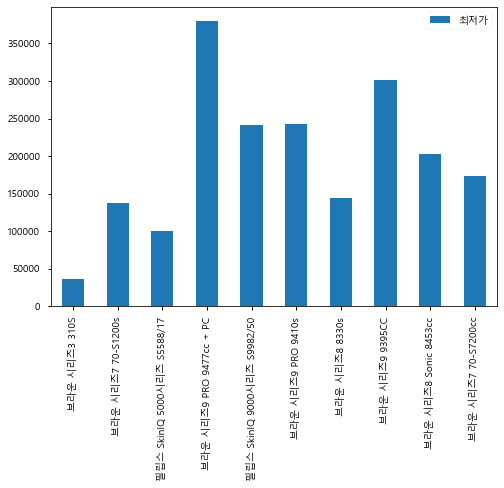

In [21]:
plt.figure(figsize=(6, 6))  
df3.plot.bar();  # 가격이 백만 단위 이상이면 1e6 같이 위에 표현됨.

# konlpy / wordcloud 시각화

In [22]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings  
warnings.filterwarnings('ignore')

In [23]:
df_r = pd.read_csv('danawa_shaver_crawl.csv')

In [24]:
df_r.리뷰글

0    전기 면도기 정말 오랜만에 구입했습니다.수염이 좀 많이 나는 편이라, 칼 면도기+쉐...
1    스트리머 침착맨 님의 11번가 십일절 광고를 보고, 브라운 면도기도 십일절 페스티벌...
2    주문하고서 이틀만에 제품을 받았습니다. 포장이 없는거 없이 다 들어가 있는데도 컴팩...
3    아들 녀석 처음엔 시리즈 7 을 사주어 사용하다 시리즈 9 으로 바꾸어 주었더니 시...
4    아버지 생신 선물로 주문해드린 면도기입니다. 일단 필립스 면도기 최신모델이라 성능면...
5    상품 박스에 봉인씰이 없는 상태로 왔네요 씰을 떼고 검수를 한 건지 아니면 중고를 ...
6    쇼핑백을 구겨서보내면 어떻게쓰라는거죠? 사은품으로 종이쓰레기를 주시나요? 한두건도아...
7    날면도기와 P사 전기면도기를 써오다 유튜브 등 검색을 해보고 구매 결정했습니다브라운...
8    저하고 안맞는지 건식면도할때 마다 피를 봅니다.그동안 날면도기만 써봤어서 그런지 깨...
9    최근까지 필립스 제품을 사용하다가유지비용이 너무 많이 들어서 찾아보니브라운제품은 교...
Name: 리뷰글, dtype: object

In [25]:
review_list = df_r.리뷰글.values.tolist()
review_list

['전기 면도기 정말 오랜만에 구입했습니다.수염이 좀 많이 나는 편이라, 칼 면도기+쉐이빙폼 의 조합만 사용하는데브라운면도기 할인하는 거 보고 그냥 구매했습니다.3시리즈 중 100주년 한정판 MBS3 제품을 사라다가파우치와 트리머를 주고, 무상A/S 5년이라 하지만,저에겐 파우치보단 보호캡이 더 실용적일듯 했고,트리머는 안쓸테고, A/S 5년은 소모성부품의 고장은 해당 안될 것 같다는 생각에...ㄱ그냥 완전방수기능이 있는 310S를 선택했네요.이 제품은 3시리즈지만, 습식면도, 100프로 방수가 되는 제품이라....일단 물건을 받았는데, 박스가 커서, 본품박스가 덜렁덜렁...다행히 제품은 이상없었구요.받자마자 충전했는데, 금방 완충이 되는거보니 오래된 재고는 아닌 것 같습니다.칼면도기만 만족하는 수염이다 보니, 좀 답답하긴 하지만,그래도 생각보다 좋네요.같은 3시리즈의 필립스보다 이 제품이 면도가 더 잘 되는 느낌.다만 제품 구조상 턱밑과 목의 경계선, 목젖부위등...굴곡에는 확실히 약하다는 느낌.. 그래도 절삭력은 만족합니다.가격을 생각하면...특히나 엔트리 모델인데, 100프로 방수, 샤워사용가능이니까요.배터리 역시 보급형 답게 리튬이온이 아닌 니켈수소라 좀 아쉽지만,가끔 완방완충 시켜주면 면도기 고장때까지 사용하는 데는 문제 없으리라 생각합니다.아쉬운 점은 역시 부실한 내용물...그래도 청소솔 하나 정도는 들어있을 줄 알았는데...암튼 이제 칼면도기 사용 횟수가 줄어들 듯 싶네요.이 가격대에서는 이 제품이 최고가 아닐까.... 정말 만족하는 면도기입니다.사용하던 면도기가 고장나서.... 인터넷에서 최저가를 검색해보니 00마트로 가요~의 00마트에서 몇백원 저렴하게 판매하기에 주문.... 기다리고 기다려도 배송이 늦어진다는 문자만 오고...안하던 날면도로 얼굴은 상하고 있는데...그러던중 00마트에서 제품은 오지않고, 가격을 천원더 올려서 상품을 올려놓았더라구요!얼마나 화가나던지.... 앞으로 내인생에서 00마트에서 전자제품을 구매할 일은 없이다!라고 결심

In [26]:
len(review_list)

10

In [27]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [28]:
# 리스트 중 str 타입이 아닌 요소들(nan값)이 존재함을 확인
# 리뷰엔 nan 값 없으므로 안해도 됨.
for i in review_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [8]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(review_list)):
    if type(review_list[i]) != str:
        review_list[i] = str(review_list[i])

In [9]:
review_list

['전기 면도기 정말 오랜만에 구입했습니다.수염이 좀 많이 나는 편이라, 칼 면도기+쉐이빙폼 의 조합만 사용하는데브라운면도기 할인하는 거 보고 그냥 구매했습니다.3시리즈 중 100주년 한정판 MBS3 제품을 사라다가파우치와 트리머를 주고, 무상A/S 5년이라 하지만,저에겐 파우치보단 보호캡이 더 실용적일듯 했고,트리머는 안쓸테고, A/S 5년은 소모성부품의 고장은 해당 안될 것 같다는 생각에...ㄱ그냥 완전방수기능이 있는 310S를 선택했네요.이 제품은 3시리즈지만, 습식면도, 100프로 방수가 되는 제품이라....일단 물건을 받았는데, 박스가 커서, 본품박스가 덜렁덜렁...다행히 제품은 이상없었구요.받자마자 충전했는데, 금방 완충이 되는거보니 오래된 재고는 아닌 것 같습니다.칼면도기만 만족하는 수염이다 보니, 좀 답답하긴 하지만,그래도 생각보다 좋네요.같은 3시리즈의 필립스보다 이 제품이 면도가 더 잘 되는 느낌.다만 제품 구조상 턱밑과 목의 경계선, 목젖부위등...굴곡에는 확실히 약하다는 느낌.. 그래도 절삭력은 만족합니다.가격을 생각하면...특히나 엔트리 모델인데, 100프로 방수, 샤워사용가능이니까요.배터리 역시 보급형 답게 리튬이온이 아닌 니켈수소라 좀 아쉽지만,가끔 완방완충 시켜주면 면도기 고장때까지 사용하는 데는 문제 없으리라 생각합니다.아쉬운 점은 역시 부실한 내용물...그래도 청소솔 하나 정도는 들어있을 줄 알았는데...암튼 이제 칼면도기 사용 횟수가 줄어들 듯 싶네요.이 가격대에서는 이 제품이 최고가 아닐까.... 정말 만족하는 면도기입니다.사용하던 면도기가 고장나서.... 인터넷에서 최저가를 검색해보니 00마트로 가요~의 00마트에서 몇백원 저렴하게 판매하기에 주문.... 기다리고 기다려도 배송이 늦어진다는 문자만 오고...안하던 날면도로 얼굴은 상하고 있는데...그러던중 00마트에서 제품은 오지않고, 가격을 천원더 올려서 상품을 올려놓았더라구요!얼마나 화가나던지.... 앞으로 내인생에서 00마트에서 전자제품을 구매할 일은 없이다!라고 결심

In [10]:
# 수집한 글들을 한 문장으로 합치기
review_text = ''

for each_line in review_list[:2000]:
    review_text = review_text + each_line + '\n'

In [11]:
review_text

'전기 면도기 정말 오랜만에 구입했습니다.수염이 좀 많이 나는 편이라, 칼 면도기+쉐이빙폼 의 조합만 사용하는데브라운면도기 할인하는 거 보고 그냥 구매했습니다.3시리즈 중 100주년 한정판 MBS3 제품을 사라다가파우치와 트리머를 주고, 무상A/S 5년이라 하지만,저에겐 파우치보단 보호캡이 더 실용적일듯 했고,트리머는 안쓸테고, A/S 5년은 소모성부품의 고장은 해당 안될 것 같다는 생각에...ㄱ그냥 완전방수기능이 있는 310S를 선택했네요.이 제품은 3시리즈지만, 습식면도, 100프로 방수가 되는 제품이라....일단 물건을 받았는데, 박스가 커서, 본품박스가 덜렁덜렁...다행히 제품은 이상없었구요.받자마자 충전했는데, 금방 완충이 되는거보니 오래된 재고는 아닌 것 같습니다.칼면도기만 만족하는 수염이다 보니, 좀 답답하긴 하지만,그래도 생각보다 좋네요.같은 3시리즈의 필립스보다 이 제품이 면도가 더 잘 되는 느낌.다만 제품 구조상 턱밑과 목의 경계선, 목젖부위등...굴곡에는 확실히 약하다는 느낌.. 그래도 절삭력은 만족합니다.가격을 생각하면...특히나 엔트리 모델인데, 100프로 방수, 샤워사용가능이니까요.배터리 역시 보급형 답게 리튬이온이 아닌 니켈수소라 좀 아쉽지만,가끔 완방완충 시켜주면 면도기 고장때까지 사용하는 데는 문제 없으리라 생각합니다.아쉬운 점은 역시 부실한 내용물...그래도 청소솔 하나 정도는 들어있을 줄 알았는데...암튼 이제 칼면도기 사용 횟수가 줄어들 듯 싶네요.이 가격대에서는 이 제품이 최고가 아닐까.... 정말 만족하는 면도기입니다.사용하던 면도기가 고장나서.... 인터넷에서 최저가를 검색해보니 00마트로 가요~의 00마트에서 몇백원 저렴하게 판매하기에 주문.... 기다리고 기다려도 배송이 늦어진다는 문자만 오고...안하던 날면도로 얼굴은 상하고 있는데...그러던중 00마트에서 제품은 오지않고, 가격을 천원더 올려서 상품을 올려놓았더라구요!얼마나 화가나던지.... 앞으로 내인생에서 00마트에서 전자제품을 구매할 일은 없이다!라고 결심하

In [12]:
tokens_ko = t.morphs(review_text)
tokens_ko

['전기',
 '면도기',
 '정말',
 '오랜',
 '만',
 '에',
 '구입',
 '했습니다',
 '.',
 '수염',
 '이',
 '좀',
 '많이',
 '나',
 '는',
 '편이',
 '라',
 ',',
 '칼',
 '면도기',
 '+',
 '쉐',
 '이빙',
 '폼',
 '의',
 '조합',
 '만',
 '사용',
 '하는데',
 '브라운',
 '면도기',
 '할인',
 '하는',
 '거',
 '보고',
 '그냥',
 '구매',
 '했습니다',
 '.',
 '3시',
 '리즈',
 '중',
 '100',
 '주년',
 '한정판',
 'MBS',
 '3',
 '제품',
 '을',
 '사라다',
 '가',
 '파우치',
 '와',
 '트리',
 '머',
 '를',
 '주고',
 ',',
 '무상',
 'A',
 '/',
 'S',
 '5년',
 '이라',
 '하지만',
 ',',
 '저',
 '에겐',
 '파우치',
 '보단',
 '보호',
 '캡',
 '이',
 '더',
 '실용',
 '적',
 '일듯',
 '했고',
 ',',
 '트리',
 '머는',
 '안',
 '쓸테고',
 ',',
 'A',
 '/',
 'S',
 '5년',
 '은',
 '소모',
 '성',
 '부품',
 '의',
 '고장',
 '은',
 '해당',
 '안될',
 '것',
 '같다는',
 '생각',
 '에',
 '...',
 'ㄱ',
 '그냥',
 '완전',
 '방수',
 '기능',
 '이',
 '있는',
 '310',
 'S',
 '를',
 '선택',
 '했네요',
 '.',
 '이',
 '제품',
 '은',
 '3시',
 '리즈지만',
 ',',
 '습',
 '식',
 '면도',
 ',',
 '100',
 '프로',
 '방수',
 '가',
 '되는',
 '제품',
 '이라',
 '....',
 '일단',
 '물건',
 '을',
 '받았는데',
 ',',
 '박스',
 '가',
 '커서',
 ',',
 '본',
 '품',
 '박스',
 '가',
 '덜렁덜렁',
 '...'

In [13]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

27579
5024


In [14]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('.', 1017),
 ('이', 697),
 ('에', 489),
 ('면도기', 448),
 ('도', 393),
 ('가', 366),
 ('사용', 331),
 ('잘', 312),
 ('은', 296),
 ('면도', 270),
 ('브라운', 264),
 ('을', 248),
 (',', 241),
 ('를', 229),
 ('는', 195),
 ('제품', 195),
 ('구매', 193),
 ('로', 193),
 ('으로', 184),
 ('가격', 135),
 ('것', 131),
 ('날', 128),
 ('배송', 126),
 ('의', 115),
 ('전', 115),
 ('..', 114),
 ('선물', 114),
 ('필립스', 109),
 ('피부', 109),
 ('너무', 108),
 ('보다', 106),
 ('수염', 105),
 ('력', 103),
 ('세척', 102),
 ('더', 95),
 ('절삭', 94),
 ('하고', 92),
 ('시리즈', 92),
 ('했는데', 89),
 ('입니다', 89),
 ('한', 89),
 ('~', 87),
 ('기', 86),
 ('!', 85),
 ('만', 82),
 ('요', 79),
 ('합니다', 79),
 ('좋은', 79),
 ('때', 78),
 ('다', 78),
 ('좀', 76),
 ('생각', 76),
 ('했습니다', 73),
 ('안', 72),
 ('많이', 70),
 ('좋습니다', 69),
 ('해서', 69),
 ('좋아요', 69),
 ('써', 67),
 ('전기', 66),
 ('구입', 66),
 ('저', 66),
 ('할', 66),
 ('...', 63),
 ('아주', 63),
 ('식', 56),
 ('충전', 56),
 ('과', 56),
 ('까지', 56),
 ('들', 56),
 ('정도', 55),
 ('에서', 55),
 ('좋네요', 54),
 ('9', 54),
 ('수', 53),
 ('인', 53),


In [20]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n','\n ', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','만','더','!','/']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('면도기', 448),
 ('사용', 331),
 ('면도', 270),
 ('브라운', 264),
 ('제품', 195),
 ('구매', 193),
 ('가격', 135),
 ('날', 128),
 ('배송', 126),
 ('전', 115),
 ('선물', 114),
 ('필립스', 109),
 ('피부', 109),
 ('너무', 108),
 ('보다', 106),
 ('수염', 105),
 ('력', 103),
 ('세척', 102),
 ('절삭', 94),
 ('하고', 92),
 ('시리즈', 92),
 ('했는데', 89),
 ('입니다', 89),
 ('기', 86),
 ('합니다', 79),
 ('좋은', 79),
 ('생각', 76),
 ('했습니다', 73),
 ('안', 72),
 ('많이', 70),
 ('좋습니다', 69),
 ('해서', 69),
 ('좋아요', 69),
 ('써', 67),
 ('전기', 66),
 ('구입', 66),
 ('저', 66),
 ('아주', 63),
 ('식', 56),
 ('충전', 56),
 ('까지', 56),
 ('정도', 55),
 ('에서', 55),
 ('좋네요', 54),
 ('9', 54),
 ('인', 53),
 ('7시', 52),
 ('상품', 51),
 ('깔끔하게', 51),
 ('이라', 50)]

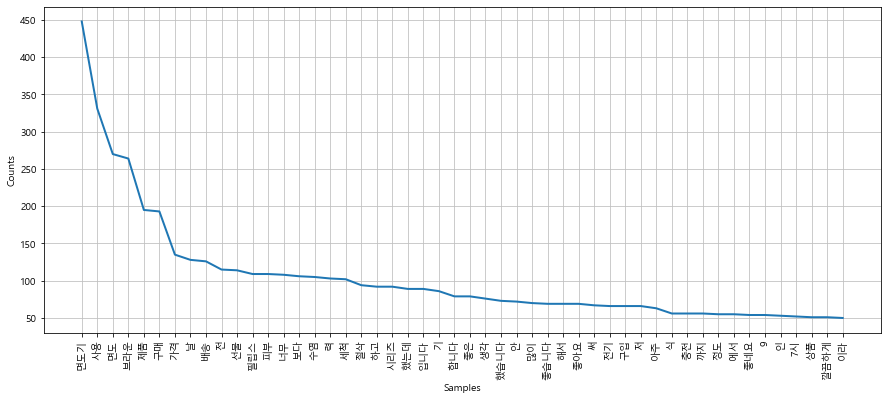

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS

from PIL import Image

In [23]:
data = ko.vocab().most_common(300)
data

[('면도기', 448),
 ('사용', 331),
 ('면도', 270),
 ('브라운', 264),
 ('제품', 195),
 ('구매', 193),
 ('가격', 135),
 ('날', 128),
 ('배송', 126),
 ('전', 115),
 ('선물', 114),
 ('필립스', 109),
 ('피부', 109),
 ('너무', 108),
 ('보다', 106),
 ('수염', 105),
 ('력', 103),
 ('세척', 102),
 ('절삭', 94),
 ('하고', 92),
 ('시리즈', 92),
 ('했는데', 89),
 ('입니다', 89),
 ('기', 86),
 ('합니다', 79),
 ('좋은', 79),
 ('생각', 76),
 ('했습니다', 73),
 ('안', 72),
 ('많이', 70),
 ('좋습니다', 69),
 ('해서', 69),
 ('좋아요', 69),
 ('써', 67),
 ('전기', 66),
 ('구입', 66),
 ('저', 66),
 ('아주', 63),
 ('식', 56),
 ('충전', 56),
 ('까지', 56),
 ('정도', 55),
 ('에서', 55),
 ('좋네요', 54),
 ('9', 54),
 ('인', 53),
 ('7시', 52),
 ('상품', 51),
 ('깔끔하게', 51),
 ('이라', 50),
 ('적', 50),
 ('자극', 50),
 ('느낌', 48),
 ('하면', 48),
 ('처음', 48),
 ('와', 47),
 ('만족합니다', 47),
 ('이번', 46),
 ('성능', 46),
 ('소음', 45),
 ('나', 44),
 ('같아요', 43),
 ('기존', 43),
 ('비', 42),
 ('면', 41),
 ('한번', 41),
 ('했어요', 41),
 ('디자인', 41),
 ('마음', 41),
 ('맘', 41),
 ('추천', 41),
 ('정말', 40),
 ('구', 40),
 ('가성', 39),
 ('좋고', 39),
 ('

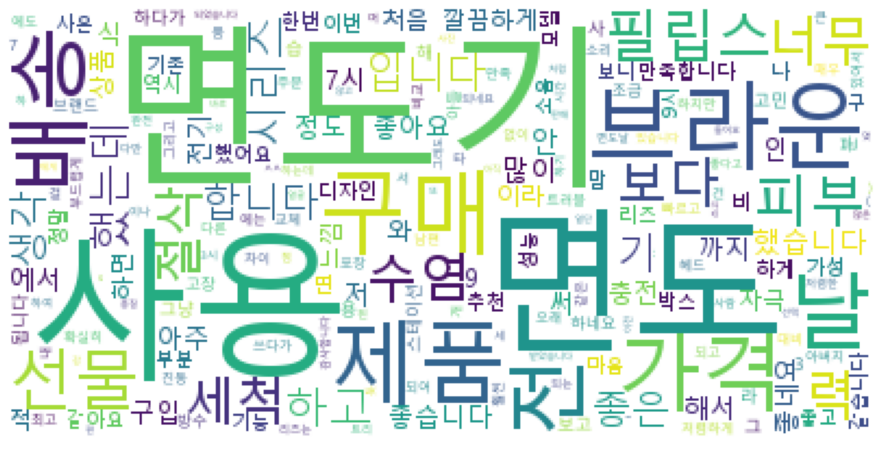

In [24]:
wordcloud = WordCloud(font_path= 'c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()